# Random forest Classifier

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
beatLen_cuttoff = 700; 
num_classes = 5;

beatTypes = {
    'N': 0, 
    'L': 1, 
    'R': 2, 
    'A': 3, 
    'V': 4
}

## Import and balance the data

In [5]:
HB_data = np.loadtxt('beats_list.csv',delimiter=',')

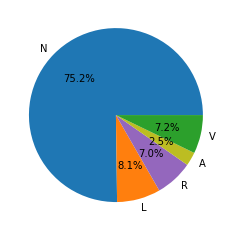

In [9]:
plot_pieChart(HB_data,num_classes)

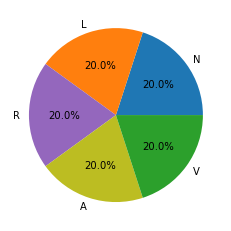

In [10]:
HB_data_bal = balance_classes(HB_data,num_classes)
plot_pieChart(HB_data_bal,num_classes)

In [11]:
X = HB_data_bal[:, :beatLen_cuttoff];
Y = HB_data_bal[:,  -1];

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2);

## Define and Train the model

In [12]:
clf=RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth= None)
clf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy')

In [13]:
Y_pred = clf.predict(X_test)

## Evaluate Model

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.9596


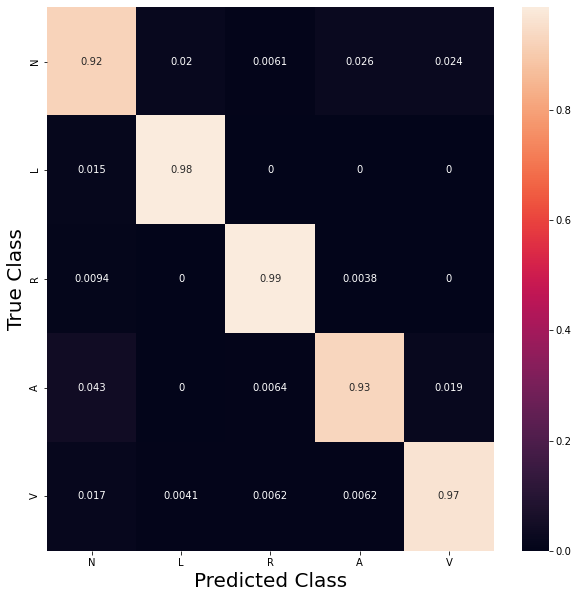

In [15]:
cm = confusion_matrix(Y_test, Y_pred, normalize='true')
df_cm = pd.DataFrame(cm, index = [i for i in beatTypes],
              columns = [i for i in beatTypes])

plt.figure(figsize = (10,10));
sn.heatmap(df_cm, annot=True);

plt.ylabel('True Class', size =20);
plt.xlabel('Predicted Class',size = 20);

In [6]:
def balance_classes(HB_data,num_classes, samples_per_class = 2500, replace = False):
    rng = np.random.default_rng()
    cols = np.shape(HB_data)[1]
    HB_data_subSamp = np.zeros((samples_per_class*num_classes,cols));
    for ii in range(num_classes):
        index = HB_data[:,-1] == ii;
        HB_ii = HB_data[HB_data[:,-1] == ii,:];
        start = ii*samples_per_class
        end = start+samples_per_class
        HB_data_subSamp[start:end,:] = rng.choice(HB_ii, samples_per_class, replace = replace)
    return HB_data_subSamp;
        

In [7]:
def plot_pieChart(data, num_classes):
    class_counts = get_classCounts(data, num_classes);
    plt.pie(class_counts, labels=beatTypes, colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')

In [8]:
def get_classCounts(data, num_classes):
    classCounts = map(lambda ii: sum(data[:,-1] == ii), range(num_classes))
    return list(classCounts)